In [ ]:
pip install /clip/Samuel_workdir/git/CellCNN

In [1]:
from CellCNN import *
import matplotlib.pyplot as plt

2021-11-25 16:43:32.499015: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-25 16:43:32.499045: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from CellCNN import *
d1 = Dataset(10000, center_density=0.9)
d1.data += 2
d2 = Dataset(10000, center_density=0.1)
ID = InputData((d1,d2), labels = np.array(([1,5],[0,0])))
Xt, Yt = ID.get_multi_cell_inputs(12000)
Xv, Yv = ID.get_multi_cell_inputs(3000)

2021-11-25 16:43:39.380941: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-25 16:43:39.380988: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-25 16:43:39.381019: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (6fcd6481b704): /proc/driver/nvidia/version does not exist
2021-11-25 16:43:39.381267: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
40/40 [==============================] - 1s 2ms/step - loss: 2.3095 - masked_accuracy: 0.0000e+00 - accuracy: 0.0967 - binary_accuracy: 0.0000e+00 - regu_loss: 0.0000e+00 - regu_grad: nan
Epoch 2/10
40/40 [==============================] - 0s 2ms/step - loss: 2.3122 - masked_accuracy: 0.0000e+00 - accuracy: 0.0906 - binary_accuracy: 0.0000e+00 - regu_loss: 0.0000e+00 - regu_grad: nan
Epoch 3/10
40/40 [==============================] - 0s 2ms/step - loss: 2.3022 - masked_accuracy: 0.0000e+00 - accuracy: 0.1011 - binary_accuracy: 0.0000e+00 - regu_loss: 0.0000e+00 - regu_grad: nan
Epoch 4/10
40/40 [==============================] - 0s 2ms/step - loss: 2.3138 - masked_accuracy: 0.0000e+00 - accuracy: 0.0978 - binary_accuracy: 0.0000e+00 - regu_loss: 0.0000e+00 - regu_grad: nan
Epoch 5/10
40/40 [==============================] - 0s 2ms/step - loss: 2.3036 - masked_accuracy: 0.0000e+00 - accuracy: 0.0937 - binary_accuracy: 0.0000e+00 - regu_loss: 0.0000e+00 - regu_grad: nan
Epoch

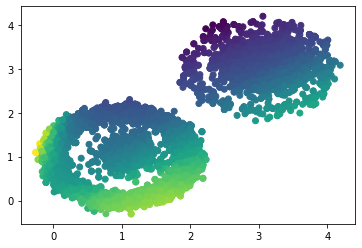

filter 3 SKIPPED
filter: 4


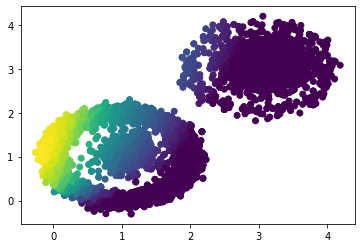

filter 5 SKIPPED
filter 6 SKIPPED
filter 7 SKIPPED
filter: 8


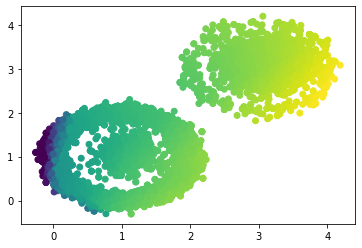

filter: 9


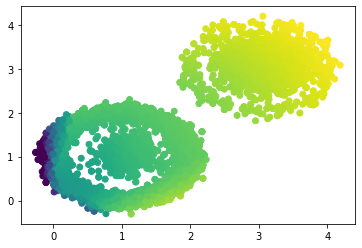

filter: 10


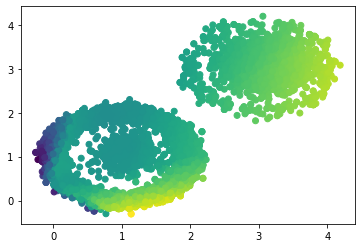

filter: 11


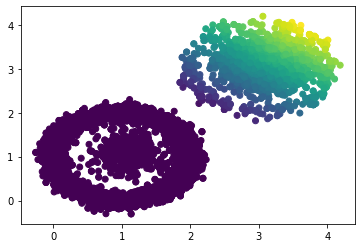

filter: 12


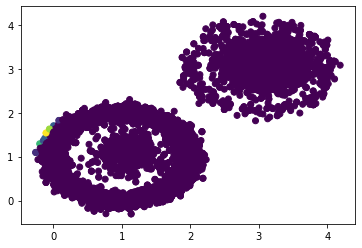

filter 13 SKIPPED
filter 14 SKIPPED
filter 15 SKIPPED


In [3]:
m = CellCNN((None, 1000, 2), conv=[128,16], l1_weight=1e-10, classes = [2,0])
m.run_eagerly=True
x = 1
m.init_random(Xt[:10])
for j in range(x):
    print(j)
    # Xtb = Xt[Xt.shape[0]//x*j:Xt.shape[0]//x*(j+1)]
    # Ytb = [Yt[i][Yt[i].shape[0]//x*j:Yt[i].shape[0]//x*(j+1)] for i in range(1)]
    m.fit(Xt,Yt, validation_data=(Xv,Yv), epochs = 1)
    sm = m.get_single_cell_model()
    cells = Xt.reshape(-1,2)[:10000]
    res = sm(cells)
for i in range(16):
    if(tf.reduce_mean(res, 0)[i]>0):
        print(f"filter: {i}")
        plt.scatter(cells[:,0], cells[:,1], c=res[:,i])
        plt.show()
    else:
        print(f"filter {i} SKIPPED")

In [ ]:
tf.math.reduce_sum([tf.ones(10) for _ in range(10)])

In [ ]:
cells = Xv.reshape(3000000,2)
res = sm(cells)
print(tf.reduce_mean(res, 0))

In [ ]:
sm = m.get_single_cell_model()
cells = Xv.reshape(3000000,2)[:10000]
res = sm(cells)
print(tf.reduce_mean(res, 0))

In [ ]:

for i in range(16):
    plt.scatter(cells[:,0], cells[:,1], c=res[:,i])
    plt.show()

In [ ]:
from CellCNN import *
import matplotlib.pyplot as plt
import numpy as np

from CellCNN import *
d1 = Dataset(100000, center_density=0.9)
d2 = Dataset(100000, center_density=0.1)
d1.data += 2
ID = InputData((d1,d2), labels = np.array(([1,5,2],[0,10,1])))
Xt, Yt = ID.get_multi_cell_inputs(12000)
Xv, Yv = ID.get_multi_cell_inputs(3000)

print(np.sum(res!=0,0)/res.shape[0]*100)
print(res.shape)

m.loss[0]

done=False
while not done:
    m = CellCNN((None, 1000, 2), conv=[64,64,16], l1_weight=1e-11, classes = [2,0,3])
    x = 10
    epochs = 1
    m.init_random(Xt[:10])
    values = []
    best_loss = float(0)
    for j in range(x):
        print(j)
        perm = np.random.permutation(Xt.shape[0])
        Xtb = Xt[perm]
        Ytb = [Yt[i][perm] for i in range(3)]
        cb = m.fit(Xtb,Ytb, validation_data=(Xv,Yv), epochs = epochs)
        sm = m.get_single_cell_model()
        # cells = Xt.reshape(-1,2)
        cells = Xv.reshape(Xv.shape[0]*Xv.shape[1],2)[:5000]
        res = sm(cells)
        values.append(tf.reduce_mean(res, 0))
        if cb.history["val_output_1_accuracy"][-1] > 0.8:
            best_loss = cb.history["val_output_1_accuracy"][-1]
            best_weights = m.get_weights()
            best_j = j
            done = True
            break
print(f"best_j = {best_j}")
m.set_weights(best_weights)
for i in range(16):
    if np.sum(res[:,i])>0:
        print(f"Filter {i}:")
        plt.scatter(cells[:,0], cells[:,1], c=res[:,i])
        plt.show()
    else:
        print(f"Filter {i} SKIPPED.")

cells = Xt.reshape(Xt.shape[0]*Xt.shape[1],2)[:5000]
res = sm(cells)
for i in range(16):
    if np.sum(res[:,i])>0:
        print(f"Filter {i}:")
        plt.scatter(cells[:,0], cells[:,1], c=res[:,i])
        plt.show()
    else:
        print(f"Filter {i} SKIPPED.")

for j in range(x):
    print(j)
    Xtb = Xt[Xt.shape[0]//x*j:Xt.shape[0]//x*(j+1)]
    Ytb = [Yt[i][Yt[i].shape[0]//x*j:Yt[i].shape[0]//x*(j+1)] for i in range(1)]
    cb = m.fit(Xtb,Ytb, validation_data=(Xv,Yv), epochs = 1)
    sm = m.get_single_cell_model()
    # cells = Xt.reshape(-1,2)
    cells = Xv.reshape(3000000,2)[:5000]
    res = sm(cells)
    values.append(tf.reduce_mean(res, 0))
    if cb.history["val_loss"][-1] < best_loss:
        best_loss = cb.history["val_loss"][-1]
        best_weights = m.get_weights()
        best_j = j
m.set_weights(best_weights)
plt.plot(values)
plt.legend(list(range(16)), loc='upper right', bbox_to_anchor=(1.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
print(values[-1])
plt.show()

for i in range(16):
    if np.sum(res[:,i])>0:
        print(f"Filter {i}:")
        plt.scatter(cells[:,0], cells[:,1], c=res[:,i])
        plt.show()
    else:
        print(f"Filter {i} SKIPPED.")

cells = Xv.reshape(3000000,2)
res = sm(cells)
print(tf.reduce_mean(res, 0))

sm = m.get_single_cell_model()
cells = Xv.reshape(3000000,2)[:5000]
res = sm(cells)
print(tf.reduce_mean(res, 0))

for i in range(16):
    plt.scatter(cells[:,0], cells[:,1], c=res[:,i])
    plt.show()

x = tf.constant(3.0)
with tf.GradientTape() as g:
  y = x * x
dy_dx = g.gradient(y, x)
print(dy_dx)